In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('iris')

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

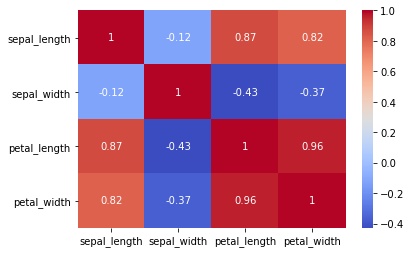

In [46]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

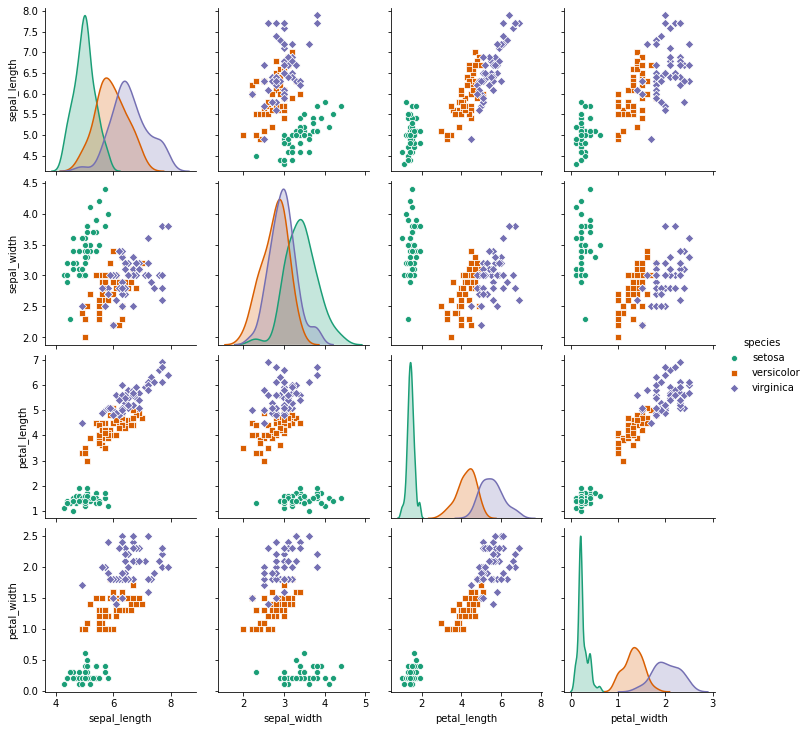

In [41]:
sns.pairplot(df,hue='species',markers=['o','s','D'],palette='Dark2')

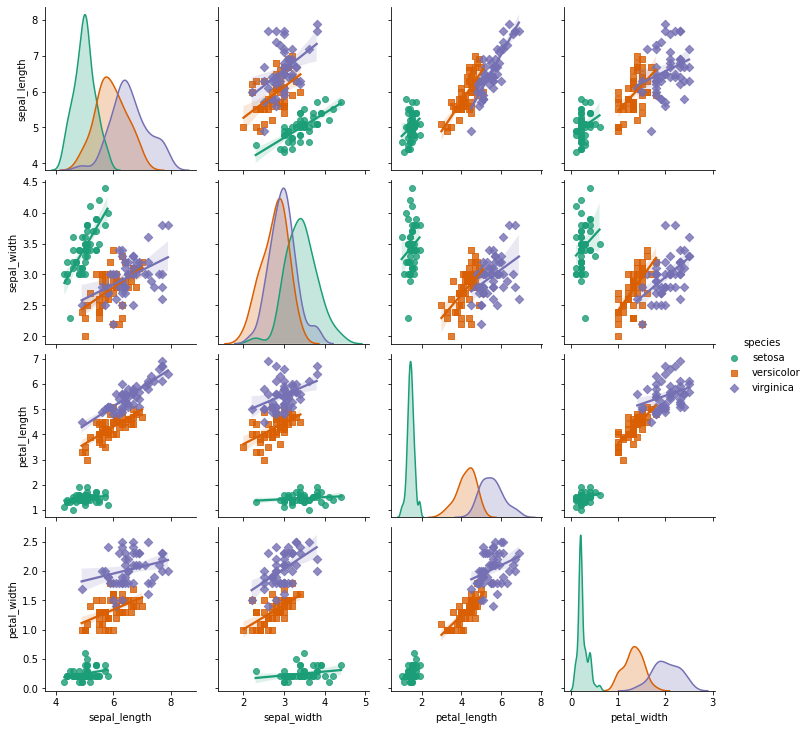

In [56]:
sns.pairplot(df,hue='species',kind='reg',markers=['o','s','D'],palette='Dark2')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

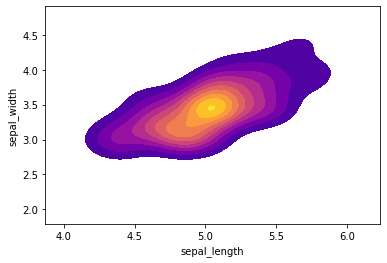

In [16]:
setosa = df[df['species']=='setosa']
sns.kdeplot(setosa['sepal_length'],setosa['sepal_width'],cmap='plasma',shade=True,shade_lowest=False)

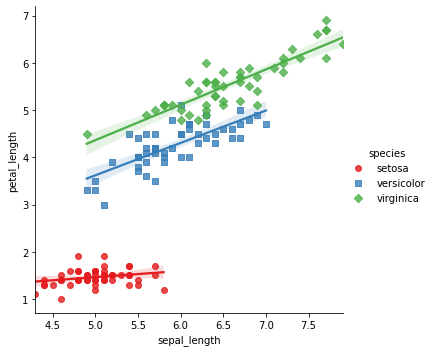

In [54]:
sns.lmplot(x='sepal_length',y='petal_length',hue='species',data=df,palette='Set1',markers=['o','s','D'])

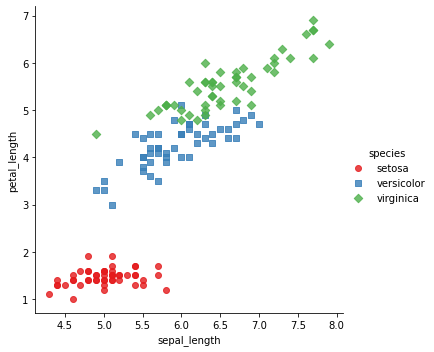

In [55]:
sns.lmplot(x='sepal_length',y='petal_length',hue='species',data=df,fit_reg=False,palette='Set1',markers=['o','s','D'])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

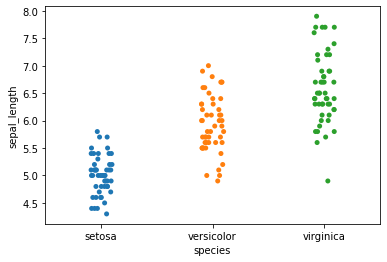

In [58]:
sns.stripplot(x='species',y='sepal_length',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

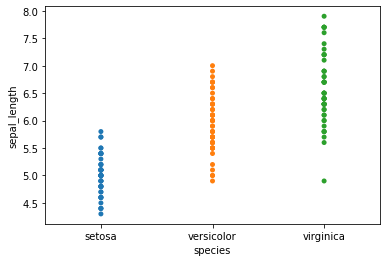

In [60]:
sns.stripplot(x='species',y='sepal_length',data=df, jitter=False)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

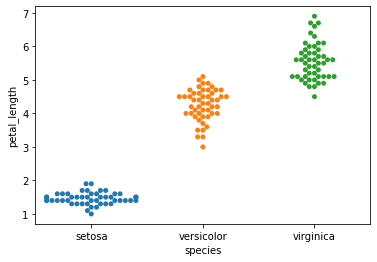

In [65]:
sns.swarmplot(x="species", y="petal_length", data=df)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('species',axis=1)
y =df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [19]:
from sklearn.svm import SVC

In [20]:
svc_model = SVC()

In [21]:
svc_model.fit(X_train,y_train)

SVC()

In [87]:
predictions = svc_model.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n Model accuracy: ',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

 Model accuracy:  0.98


In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [35]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [36]:
grid_predictions = grid.predict(X_test)

In [70]:
print(classification_report(y_test,predictions))
print('\n')

print(confusion_matrix(y_test,predictions))
print('\n Model Accuracy: ',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

 Model Accuracy:  0.98
